<p style="font-family: helvetica,arial,sans-serif; font-size:2.0em;color:white; background-color: black;">&emsp;<b>EDA: Compare Pedestrian Traffic before Covid to now</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Authored by: </b>Barkha Javed</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right"> <b>Duration:</b> 45 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Level: </b>Beginner&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Pre-requisite Skills: </b>Python</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

# Business & Activity 
As a small business owner, I want to understand how covid affected foot traffic, and how long it might take to return to normal. I'd also like deeper insights into how different activities can impact pedestrian traffic.

 Factors impacting traffic include those listed below, we will be examining some of these in depth:
- Seasonality through temperature, severe weather events,  daylight savings, public holidays such as Christmas, school holidays, 
- Time of day, day of week
- Major events such as the AFL, concerts and exhibitions
- Proximity to public transport: Trains / Buses / Trams
- Number of local residences
- Number of people travelling into the CBD
- Covid cases and status
- Other venues in proximity - schools, universities, parks, retail outlets, restaurants, bars, clubs, cinemas

This exploratory data analysis looks at <b><i>Covid impact on foot traffic</i></b>.

## Data Preparation

In [1]:
# pip -q is to give less output
!pip -q install sodapy
!pip -q install seaborn
!pip -q install pandas
!pip -q install matplotlib
!pip -q install numpy
!pip -q install nbconvert
!pip -q install keyboard

In [2]:
#load libraries
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sodapy import Socrata
import keyboard
import warnings
warnings.filterwarnings('ignore')

#Socrata API connection details
client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)
sensor_data_id = "h57g-5234"

### Data Acquisition Pedestrian Sensor Locations

In [3]:
#Location data
results = client.get(sensor_data_id)
sensor_location = pd.DataFrame.from_records(results)
#sensor_location.head(5)

sensor_location[['latitude', 'longitude']] = sensor_location[['latitude', 'longitude']].astype(float)
sensor_location = sensor_location.drop('location',axis=1)

#View sensor data
sensor_location.info()
sensor_location.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_id           91 non-null     object 
 1   sensor_description  91 non-null     object 
 2   sensor_name         91 non-null     object 
 3   installation_date   91 non-null     object 
 4   status              91 non-null     object 
 5   note                10 non-null     object 
 6   latitude            91 non-null     float64
 7   longitude           91 non-null     float64
 8   direction_1         78 non-null     object 
 9   direction_2         78 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.2+ KB


,sensor_id,sensor_description,sensor_name,installation_date,status,note,latitude,longitude,direction_1,direction_2
0,16,Australia on Collins,Col270_T,2009-03-30T00:00:00.000,R,Device moved to location ID 53 (22/09/2015),-37.815734,144.965210,NaN,NaN
1,50,Faraday St-Lygon St (West),Lyg309_T,2017-11-30T00:00:00.000,A,NaN,-37.798082,144.967210,South,North
2,73,Bourke St - Spencer St (South),Bou655_T,2020-10-02T00:00:00.000,I,NaN,-37.816957,144.954154,East,West
3,66,State Library - New,QVN_T,2020-04-06T00:00:00.000,A,NaN,-37.810578,144.964443,South,North
4,59,Building 80 RMIT,RMIT_T,2019-02-13T00:00:00.000,A,NaN,-37.808256,144.963049,South,North


### Data Acquisition Pedestrian Foot Traffic

In [4]:
##Uncomment lines below to open data source, download sensor data, and store it as a csv locally.
#results = client.get(sensor_data_id, limit=7000000)
#ds_traffic = pd.DataFrame.from_records(results)
#ds_traffic.to_csv('sensor_traffic.csv', index=False)

sensor_traffic = pd.read_csv('sensor_traffic.csv')
sensor_traffic.info()

print(f'\nThe shape of dataset is {sensor_traffic.shape}. \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463670 entries, 0 to 4463669
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   date_time      object
 2   year           int64 
 3   month          object
 4   mdate          int64 
 5   day            object
 6   time           int64 
 7   sensor_id      int64 
 8   sensor_name    object
 9   hourly_counts  int64 
dtypes: int64(6), object(4)
memory usage: 340.6+ MB

The shape of dataset is (4463670, 10). 



In [5]:
#Add date column
sensor_traffic['date'] = pd.to_datetime(sensor_traffic.date_time).dt.date
sensor_traffic.head(10)

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts,date
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300,2019-11-01
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604,2019-11-01
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216,2019-11-01
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627,2019-11-01
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774,2019-11-01
5,2887633,2019-11-01T17:00:00.000,2019,November,1,Friday,17,29,St Kilda Rd-Alexandra Gardens,644,2019-11-01
6,2887634,2019-11-01T17:00:00.000,2019,November,1,Friday,17,42,Grattan St-Swanston St (West),453,2019-11-01
7,2887635,2019-11-01T17:00:00.000,2019,November,1,Friday,17,43,Monash Rd-Swanston St (West),387,2019-11-01
8,2887636,2019-11-01T17:00:00.000,2019,November,1,Friday,17,44,Tin Alley-Swanston St (West),27,2019-11-01
9,2887637,2019-11-01T17:00:00.000,2019,November,1,Friday,17,35,Southbank,2691,2019-11-01


In [6]:
# Mesh pedestrian sensor location and foot traffic datasets

#convert sensor_id to integer, for merge
sensor_traffic['sensor_id']=sensor_traffic['sensor_id'].astype(int)
sensor_location['sensor_id']=sensor_location['sensor_id'].astype(int)

sensor_ds = pd.merge(sensor_traffic, sensor_location, on='sensor_id')

#Add column
sensor_ds['installation_dt'] = pd.to_datetime(sensor_ds.installation_date).dt.date

#Drop column
sensor_ds = sensor_ds.drop(['installation_date','status','note','sensor_name_x'],axis=1)

#Add columns
sensor_ds['pre2020_hourly_counts'] = np.where(sensor_ds['year']<=2019,sensor_ds['hourly_counts'] , 0) #before Covid
sensor_ds['post2019_hourly_counts'] = np.where(sensor_ds['year']>2019,sensor_ds['hourly_counts'] , 0) #from Covid onwards
sensor_ds.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4463670 entries, 0 to 4463669
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   date_time               object 
 2   year                    int64  
 3   month                   object 
 4   mdate                   int64  
 5   day                     object 
 6   time                    int64  
 7   sensor_id               int32  
 8   hourly_counts           int64  
 9   date                    object 
 10  sensor_description      object 
 11  sensor_name_y           object 
 12  latitude                float64
 13  longitude               float64
 14  direction_1             object 
 15  direction_2             object 
 16  installation_dt         object 
 17  pre2020_hourly_counts   int64  
 18  post2019_hourly_counts  int64  
dtypes: float64(2), int32(1), int64(7), object(9)
memory usage: 664.1+ MB


## Examine Pedestrian Traffic pre 2020 and post 2019

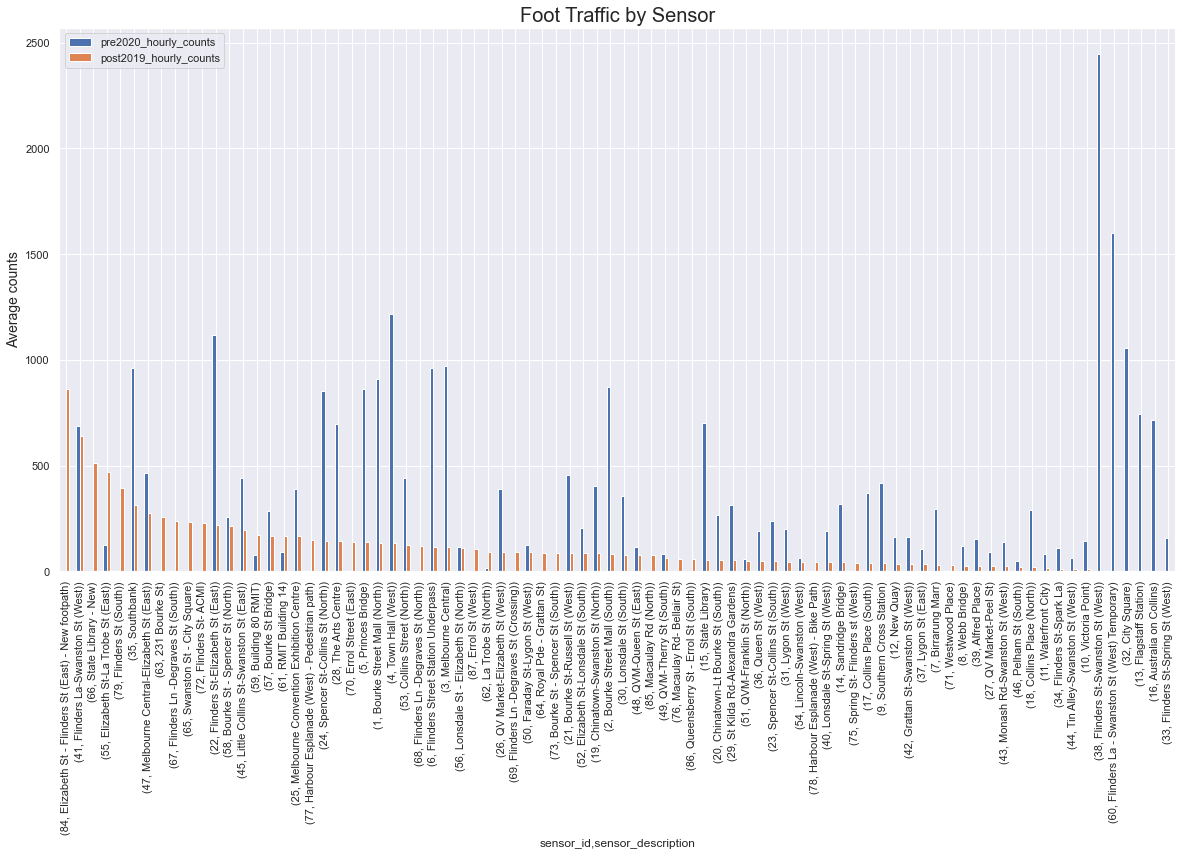

In [7]:
#examine pre Covid and post 2019 foot traffic
ds = sensor_ds.groupby(["sensor_id","sensor_description",])["pre2020_hourly_counts","post2019_hourly_counts"].mean()
ds = ds.sort_values(["post2019_hourly_counts","pre2020_hourly_counts"], ascending=False)
axs = ds.plot.bar(figsize=(20, 10))
axs.set_title('Foot Traffic by Sensor', size=20)
axs.set_ylabel('Average counts', size=14)
plt.show()

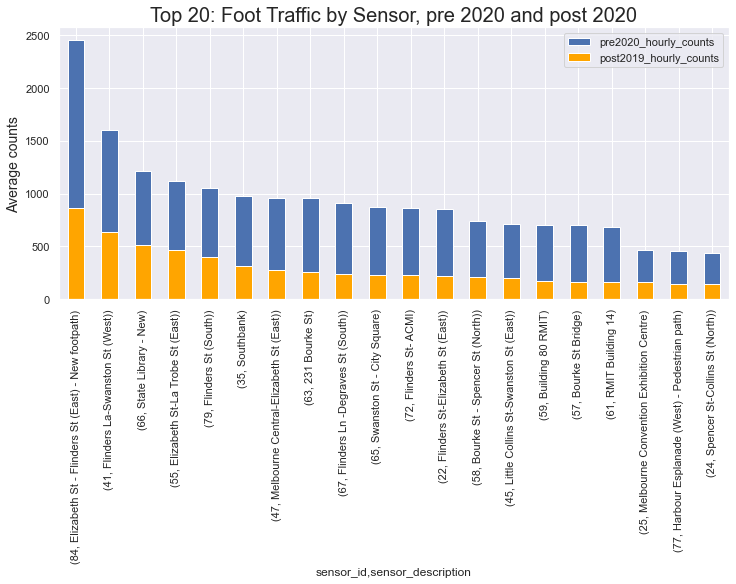

In [8]:
#distribution by traffic, sensors with most traffic - post 2019
pivot = pd.pivot_table(sensor_ds, values='pre2020_hourly_counts', index=['sensor_id','sensor_description'], aggfunc=np.mean)
pivot_ds = pivot['pre2020_hourly_counts'].nlargest(n=20)
pivot_ds.plot.bar(figsize=(12, 5), legend=True);

pivot = pd.pivot_table(sensor_ds, values='post2019_hourly_counts', index=['sensor_id','sensor_description'], aggfunc=np.mean)
pivot_ds = pivot['post2019_hourly_counts'].nlargest(n=20)
axs = pivot_ds.plot.bar(figsize=(12, 5), color='orange', legend=True);

axs.set_title('Top 20: Foot Traffic by Sensor, pre 2020 and post 2020', size=20)
axs.set_ylabel('Average counts', size=14)
plt.show()

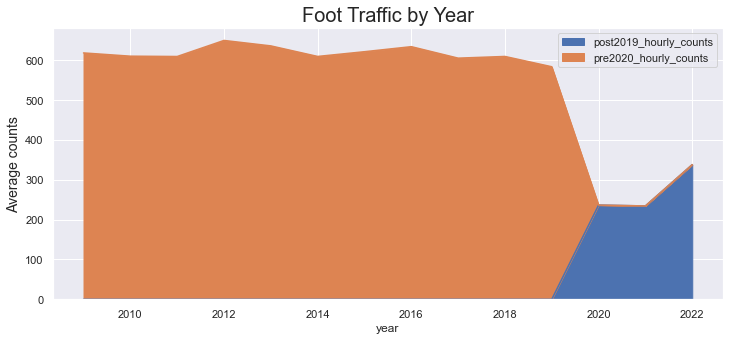

In [9]:
#distribution by traffic per year
pivot = pd.pivot_table(sensor_ds, values=["pre2020_hourly_counts","post2019_hourly_counts"], index=['year'], aggfunc=np.mean)
axs = pivot.plot.area(figsize=(12, 5));

axs.set_title('Foot Traffic by Year', size=20)
axs.set_ylabel('Average counts', size=14)
plt.show()


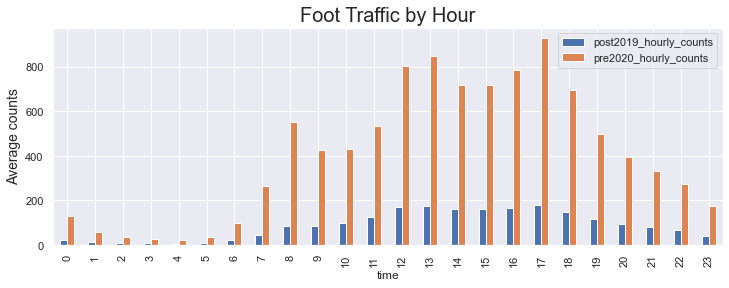

In [10]:
#distribution by traffic - post 2019
pivot = pd.pivot_table(sensor_ds, values=["pre2020_hourly_counts","post2019_hourly_counts"], index=['time'], aggfunc=np.mean)
axs = pivot.plot.bar(figsize=(12, 4));
# plt.subplots(figsize=(12, 4))

axs.set_title('Foot Traffic by Hour', size=20)
axs.set_ylabel('Average counts', size=14)
plt.show()


### Data Acquisition Covid datasets

In [11]:
#download covid datasets
url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_deaths.csv"
download = requests.get(url).content
df_deaths= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_state.csv"
download = requests.get(url).content
df_cases= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_Data_Hub_State.csv"
download = requests.get(url).content
df_hub= pd.read_csv(io.StringIO(download.decode('utf-8')))


#### Deaths in Victoria

          date state  age age_bracket  gender  dd  state_cumulative
11  2020-03-26   VIC  0.0       70-79    Male  70                 1
12  2020-03-26   VIC  0.0       70-79    Male  70                 2
13  2020-03-26   VIC  0.0       70-79    Male  70                 3
16  2020-03-29   VIC  0.0       80-89    Male  80                 4
23  2020-04-02   VIC  0.0       70-79  Female  70                 5 

               age  state_cumulative
count  5462.000000       5462.000000
mean      0.012083       2731.500000
std       0.719265       1576.887916
min       0.000000          1.000000
25%       0.000000       1366.250000
50%       0.000000       2731.500000
75%       0.000000       4096.750000
max      51.000000       5462.000000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5462 entries, 11 to 14055
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5462 non-null   object 
 1   s

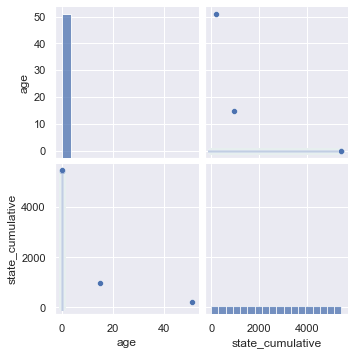

In [12]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
df = df_deaths[df_deaths['state'].isin(options)]
ds1 = df.fillna(0)

print (ds1.head(), '\n')
print (ds1.describe(), '\n')
print (ds1.info())
print("\nTotal number of missing values is","{:,d}".format(ds1.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds1.isnull().sum())
sns.pairplot(ds1)

#### Cases, Vaccines and Deaths  in Victoria

In [13]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
ds = df_cases[df_cases['state_abbrev'].isin(options)]
ds_cases = ds[['date','state_abbrev','confirmed','deaths','positives','vaccines']]


print (ds_cases.head(), '\n')
print (ds_cases.describe(), '\n')
print (ds_cases.info())
print("\nTotal number of missing values is","{:,d}".format(ds_cases.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_cases.isnull().sum())


          date state_abbrev  confirmed  deaths  positives  vaccines
6   2020-01-25          VIC          1       0          1         0
14  2020-01-26          VIC          0       0          0         0
22  2020-01-27          VIC          0       0          0         0
30  2020-01-28          VIC          0       0          0         0
38  2020-01-29          VIC          2       0          2         0 

           confirmed      deaths      positives       vaccines
count     967.000000  967.000000     967.000000     967.000000
mean     2673.139607    5.648397    2673.139607   16641.798345
std      9159.167318    9.526603    9159.167318   25850.147868
min     -2350.000000    0.000000   -2350.000000  -81162.000000
25%         2.000000    0.000000       2.000000       0.000000
50%        33.000000    0.000000      33.000000    1656.000000
75%      2404.500000    9.000000    2404.500000   24051.000000
max    255050.000000  107.000000  255050.000000  131513.000000 

<class 'pandas.core.f

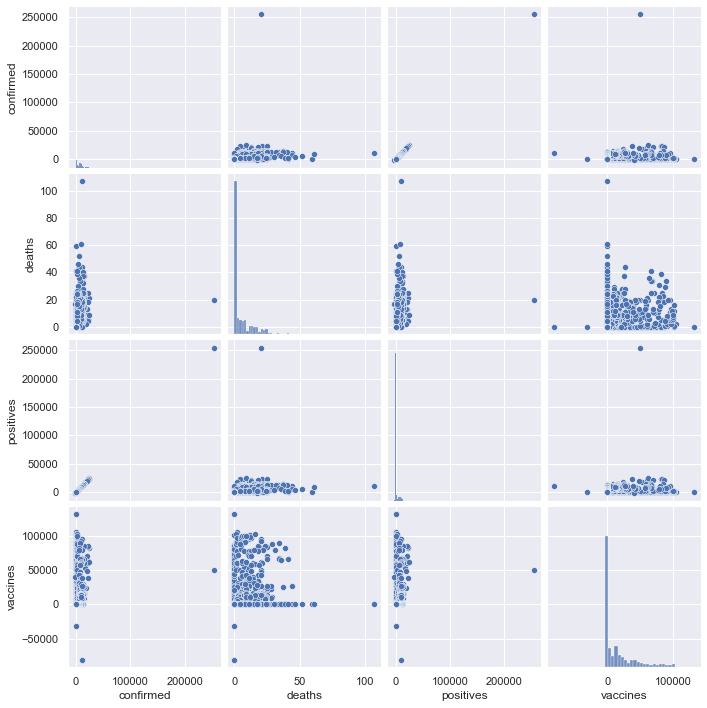

In [14]:
sns.pairplot(ds_cases)

#### Cases, People Vaccinated and Deaths  in Victoria

In [15]:
#look at VIC data
options = ['Victoria']
  
# selecting rows based on condition
ds = df_hub[df_hub['administrative_area_level_2'].isin(options)]
ds_hub = ds[['date','confirmed','deaths','positives','people_vaccinated','people_fully_vaccinated','administrative_area_level_2']]

#log transform - may want to apply to more variables
ds_hub['confirmed_log']=np.log(np.log(ds_hub['confirmed']))

print (ds_hub.head(), '\n')
print (ds_hub.describe(), '\n')
print (ds_hub.info())
print("\nTotal number of missing values is","{:,d}".format(ds_hub.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_hub.isnull().sum())


          date  confirmed  deaths  positives  people_vaccinated  \
6   2020-01-25          1       0        0.0                  0   
14  2020-01-26          1       0        0.0                  0   
22  2020-01-27          1       0        0.0                  0   
30  2020-01-28          1       0        0.0                  0   
38  2020-01-29          3       0        0.0                  0   

    people_fully_vaccinated administrative_area_level_2  confirmed_log  
6                         0                    Victoria           -inf  
14                        0                    Victoria           -inf  
22                        0                    Victoria           -inf  
30                        0                    Victoria           -inf  
38                        0                    Victoria       0.094048   

          confirmed       deaths     positives  people_vaccinated  \
count  9.670000e+02   967.000000  9.660000e+02       9.670000e+02   
mean   4.583614e+05

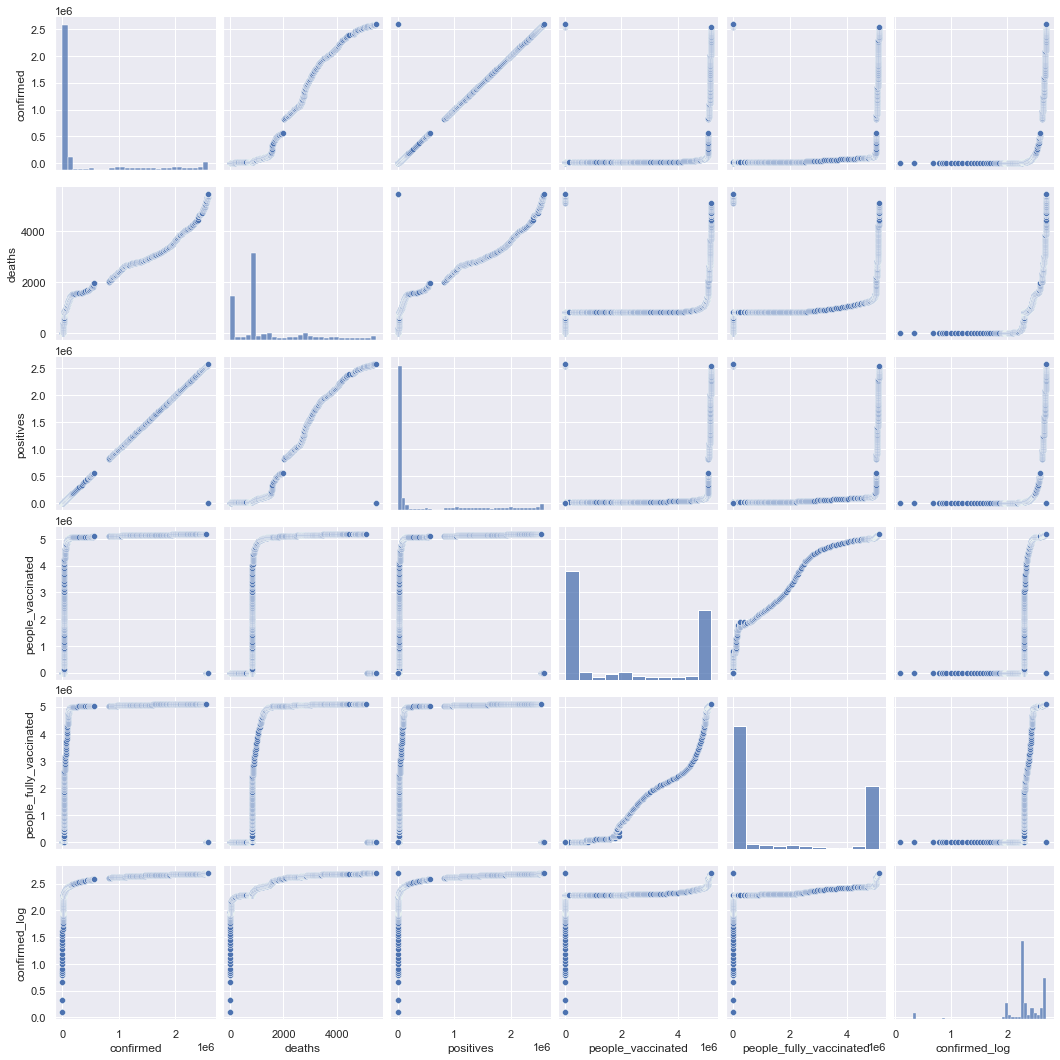

In [16]:
sns.pairplot(ds_hub)

Will examine this Covid dataset in detail, as it has a combination of vaccinated, cases and deaths, by date.

Add extra columns, to examine by year, month and day of week.

In [17]:
#Add day of week, year
ds_hub['date'] = pd.to_datetime(ds_hub['date'], infer_datetime_format=True)
ds_hub['day'] = ds_hub['date'].dt.day_name()
ds_hub['year']= ds_hub['date'].dt.year
ds_hub['dayofyear']= ds_hub['date'].dt.dayofyear
ds_hub['month']= ds_hub['date'].dt.month_name()
ds_hub['mdate']= ds_hub['date'].dt.month

In [18]:
ds_hub.head(10)

,date,confirmed,deaths,positives,people_vaccinated,people_fully_vaccinated,administrative_area_level_2,confirmed_log,day,year,dayofyear,month,mdate
6,2020-01-25,1,0,0.0,0,0,Victoria,-inf,Saturday,2020,25,January,1
14,2020-01-26,1,0,0.0,0,0,Victoria,-inf,Sunday,2020,26,January,1
22,2020-01-27,1,0,0.0,0,0,Victoria,-inf,Monday,2020,27,January,1
30,2020-01-28,1,0,0.0,0,0,Victoria,-inf,Tuesday,2020,28,January,1
38,2020-01-29,3,0,0.0,0,0,Victoria,0.094048,Wednesday,2020,29,January,1
46,2020-01-30,3,0,0.0,0,0,Victoria,0.094048,Thursday,2020,30,January,1
54,2020-01-31,3,0,0.0,0,0,Victoria,0.094048,Friday,2020,31,January,1
62,2020-02-01,4,0,0.0,0,0,Victoria,0.326634,Saturday,2020,32,February,2
70,2020-02-02,4,0,0.0,0,0,Victoria,0.326634,Sunday,2020,33,February,2
78,2020-02-03,4,0,0.0,0,0,Victoria,0.326634,Monday,2020,34,February,2


<AxesSubplot:xlabel='year,mdate,month'>

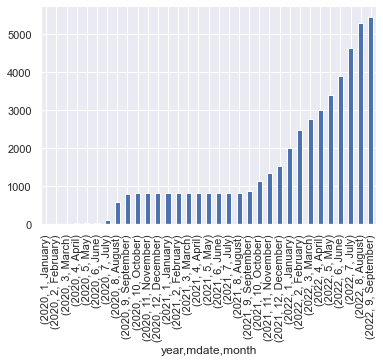

In [19]:
#As cumulative totals by date, use max for aggregation
death_totals = ds_hub.groupby(["year","mdate","month"])["deaths"].max()
death_totals.plot.bar()

<AxesSubplot:xlabel='year,mdate,month'>

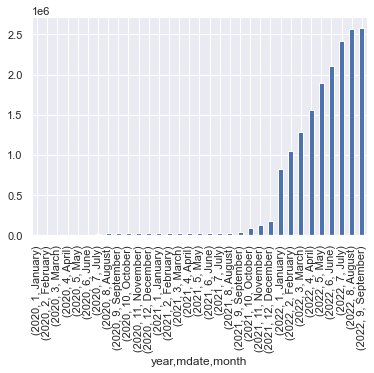

In [20]:
cases_cmax = ds_hub.groupby(["year","mdate","month"])["positives"].max()
cases_cmax.plot.bar()

<AxesSubplot:xlabel='year,mdate,month'>

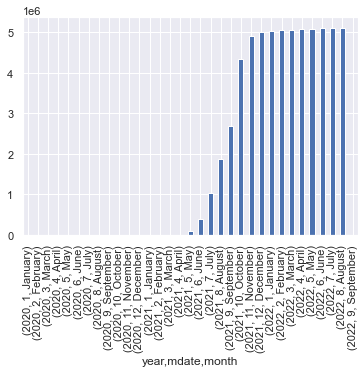

In [21]:
#As cumulative totals by date, use max for aggregation
pfvac_totals = ds_hub.groupby(["year","mdate","month"])["people_fully_vaccinated"].max()
pfvac_totals.plot.bar()

### Merge Foot Traffic and Covid datasets 

In [22]:
#check merge column is of same data type, convert if required
ds_hub['date'] = pd.to_datetime(ds_hub['date'], infer_datetime_format=True)
sensor_ds['date'] = pd.to_datetime(sensor_ds['date'], infer_datetime_format=True)

ds_hub.info()
sensor_ds.info()

# Mesh Covid and foot traffic datasets
sensor_covid = pd.merge(sensor_ds, ds_hub, on='date')

#drop columns
sensor_covid = sensor_covid.drop(['year_x','day_x','month_x','mdate_x','date_time'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 6 to 7734
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         967 non-null    datetime64[ns]
 1   confirmed                    967 non-null    int64         
 2   deaths                       967 non-null    int64         
 3   positives                    966 non-null    float64       
 4   people_vaccinated            967 non-null    int64         
 5   people_fully_vaccinated      967 non-null    int64         
 6   administrative_area_level_2  967 non-null    object        
 7   confirmed_log                967 non-null    float64       
 8   day                          967 non-null    object        
 9   year                         967 non-null    int64         
 10  dayofyear                    967 non-null    int64         
 11  month                        967 non-null   

In [23]:
print (sensor_covid.describe(), '\n')
print (sensor_covid.info())

#write to file if required
#sensor_covid.to_csv('sensor_covid.csv', index=False)

                 id          time     sensor_id  hourly_counts      latitude  \
count  1.464239e+06  1.464239e+06  1.464239e+06   1.464239e+06  1.464239e+06   
mean   3.733027e+06  1.150009e+01  3.854237e+01   2.550408e+02 -3.781229e+01   
std    4.245593e+05  6.922164e+00  2.240790e+01   4.311986e+02  6.614196e-03   
min    2.999432e+06  0.000000e+00  1.000000e+00   0.000000e+00 -3.782402e+01   
25%    3.365492e+06  6.000000e+00  2.000000e+01   2.200000e+01 -3.781689e+01   
50%    3.731551e+06  1.200000e+01  4.000000e+01   9.400000e+01 -3.781349e+01   
75%    4.103082e+06  1.800000e+01  5.700000e+01   2.860000e+02 -3.780842e+01   
max    4.469141e+06  2.300000e+01  8.700000e+01   1.443700e+04 -3.779432e+01   

          longitude  pre2020_hourly_counts  post2019_hourly_counts  \
count  1.464239e+06              1464239.0            1.464239e+06   
mean   1.449619e+02                    0.0            2.550408e+02   
std    8.304239e-03                    0.0            4.311986e+02   

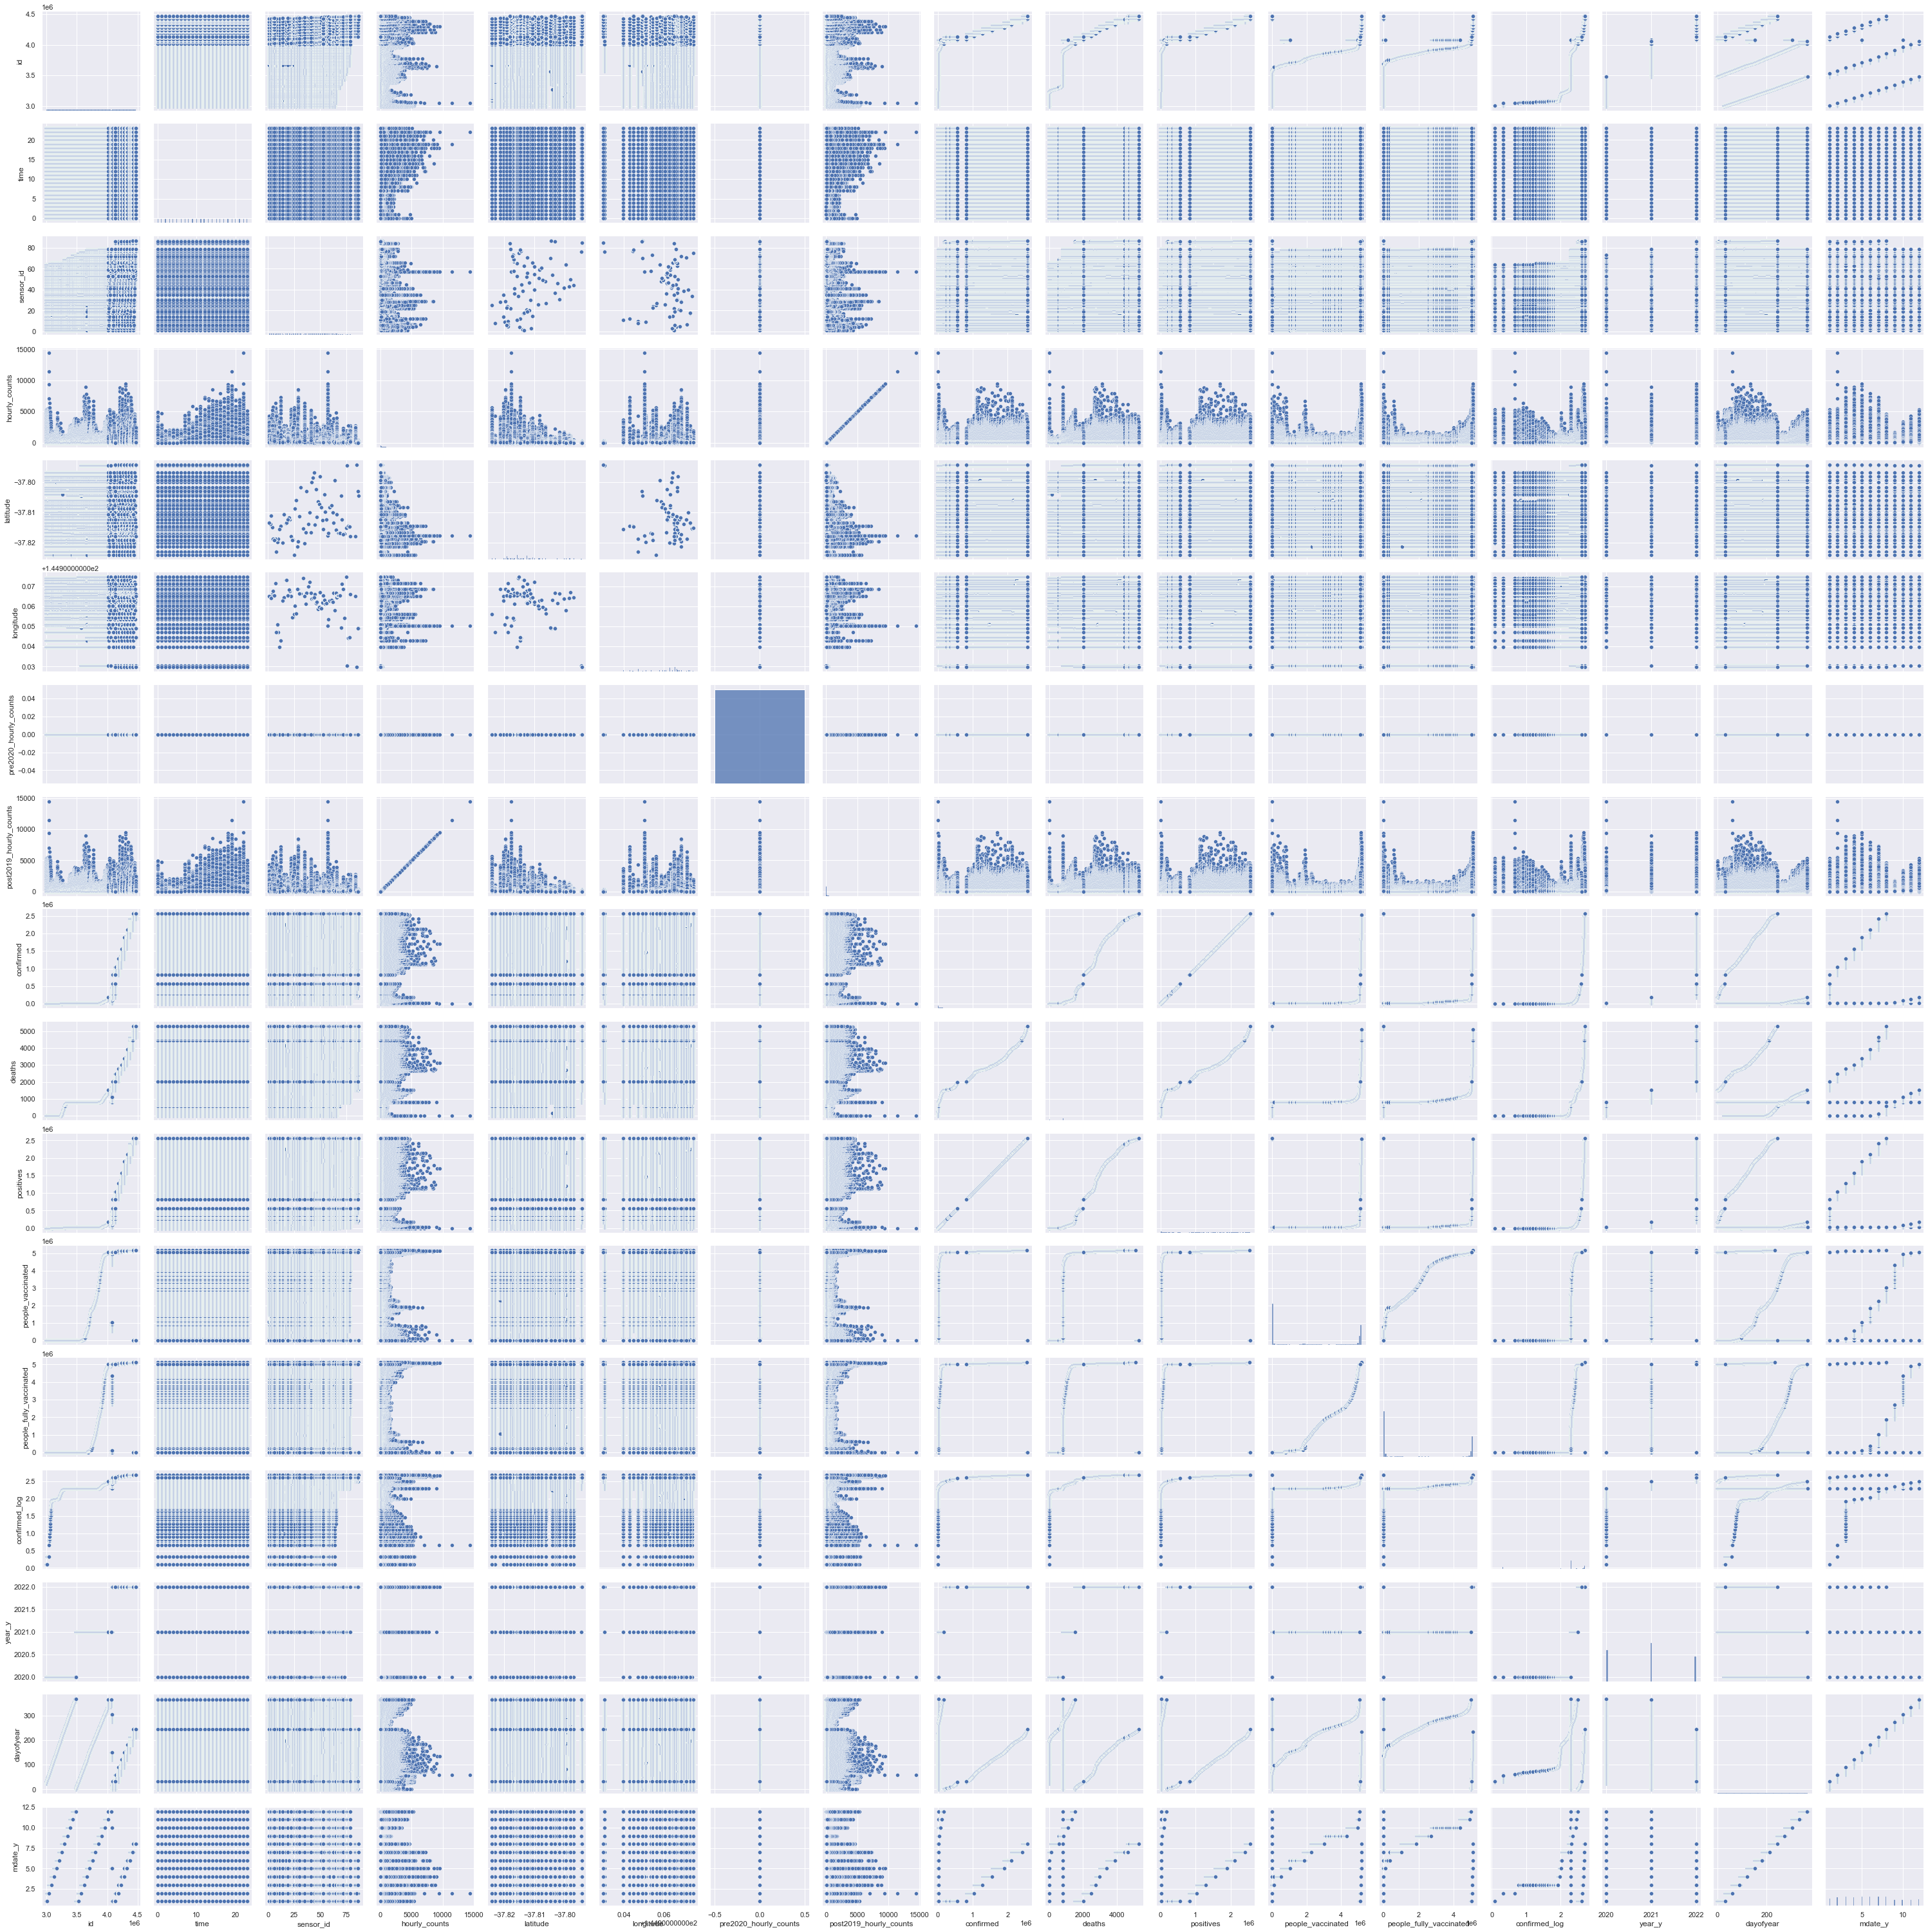

In [24]:
# Examine
sns.pairplot(sensor_covid)

### Identify areas of interest

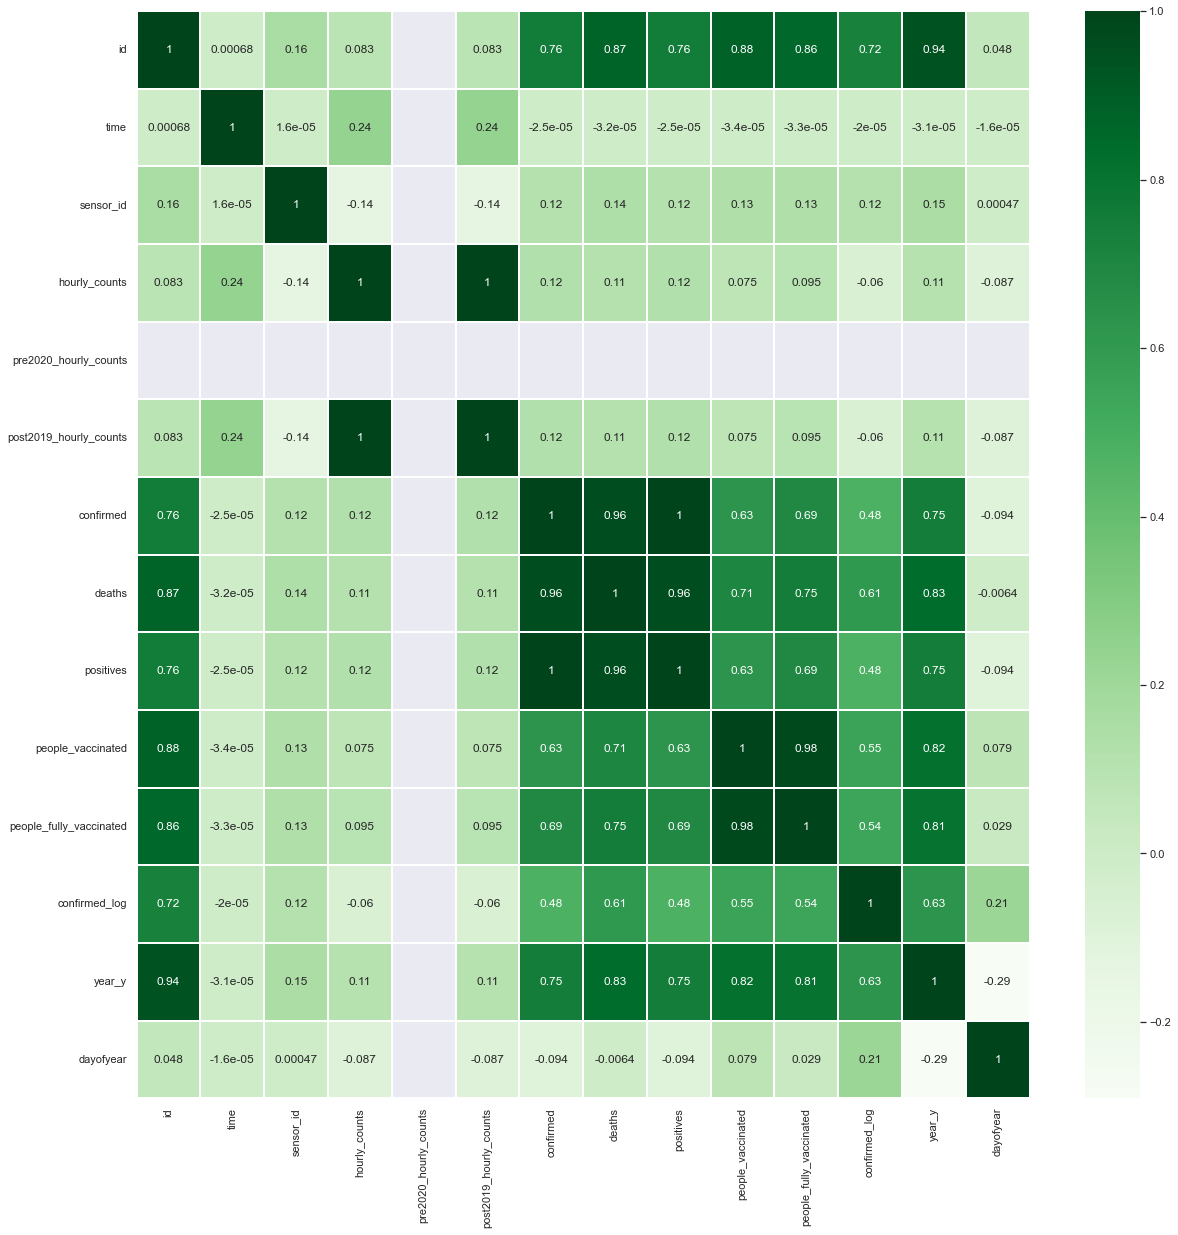


Insignificant features
id                         0.083286
people_vaccinated          0.075280
people_fully_vaccinated    0.094779
confirmed_log              0.059612
dayofyear                  0.086726
Name: hourly_counts, dtype: float64

Significant features
time                      0.238592
sensor_id                 0.135977
hourly_counts             1.000000
post2019_hourly_counts    1.000000
confirmed                 0.120486
deaths                    0.114550
positives                 0.120486
year_y                    0.106089
Name: hourly_counts, dtype: float64


In [25]:

#Drop column
sensor_covid_ds = sensor_covid.drop(['latitude','longitude','mdate_y'],axis=1)

#Examine features
#Using Pearson Correlation
plt.figure(figsize=(20,20))

df = sensor_covid_ds.dropna() #remove na's

cor = df.corr(method='pearson')
sns.heatmap(cor,  xticklabels=cor.columns,
            yticklabels=cor.columns,
            annot=True, cmap=plt.cm.Greens, linewidth=0.1)
plt.show()


#Correlation with output variable
cor_target = abs(cor["hourly_counts"])

#Selecting insignificant features, correlation under 0.1
insignificant_features = cor_target[cor_target<0.1]
print("\nInsignificant features")
print(insignificant_features)

#Selecting significant features, correlation over 0.1
significant_features = cor_target[cor_target>=0.1]
print("\nSignificant features")
print(significant_features)


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>References</b>

O'Brien J, et al., 2020, 'Covid 19 in Australia', covid19data.com.au, date retrieved 20 Aug 2022, <https://www.covid19data.com.au/>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Monthly (counts per hour)', City of Melbourne, date retrieved 11 Aug 2022, <https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/b2ak-trbp>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Sensor Locations', City of Melbourne, date retrieved 26 Aug 2022, <https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234>


    

In [27]:
#save notebook, required so that step to convert to html, writes latest results to file
# may need to adapt for other OS, this is for Windows
keyboard.press_and_release('ctrl+s')

!jupyter nbconvert  eda_compare_pedestrian_traffic_precovid_to_now.ipynb --to html

[NbConvertApp] Converting notebook eda_compare_pedestrian_traffic_precovid_to_now.ipynb to html
[NbConvertApp] Writing 3559190 bytes to eda_compare_pedestrian_traffic_precovid_to_now.html
